In [51]:
# LIBRERIAS 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.diagnostic import acorr_ljungbox
from scipy.stats import shapiro
import matplotlib.ticker as mtick

In [52]:
# LECTURA DE DATOS
df_turnover = pd.read_csv("sales_ecom_history.csv")
df_exogenas = pd.read_csv("exogenas_forecast.csv")

# Convertir las columnas 'date' a tipo datetime
df_turnover['date'] = pd.to_datetime(df_turnover['date'])
df_exogenas['date'] = pd.to_datetime(df_exogenas['date'])

# Unir los DataFrames en función de la columna 'date'
df_combined = pd.merge(df_turnover, df_exogenas, on='date')

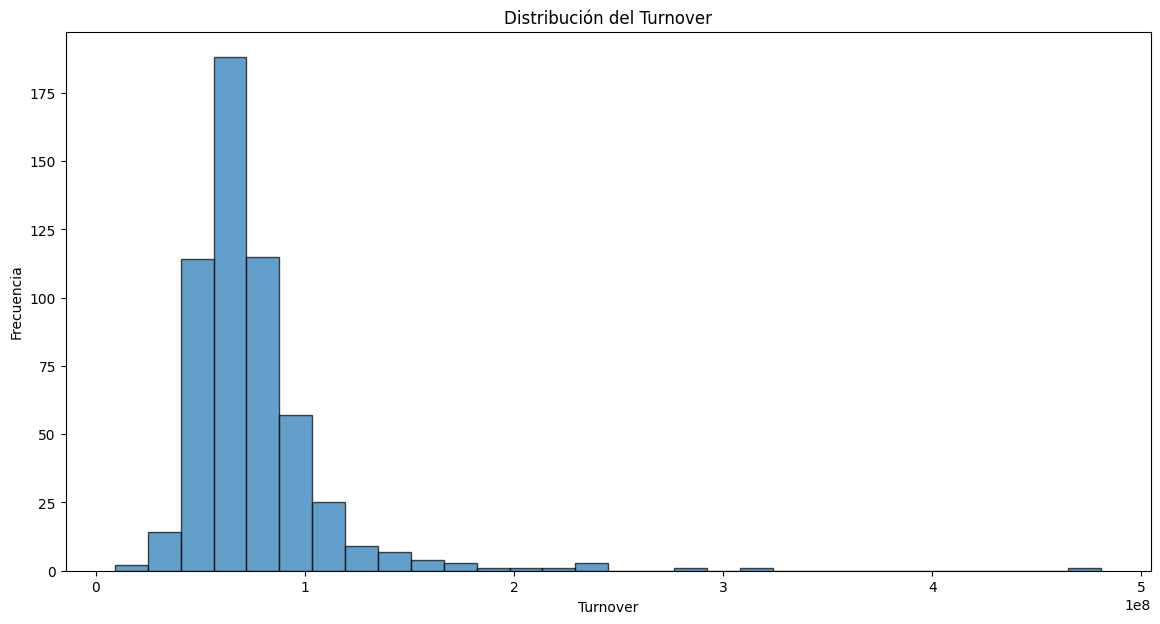

In [53]:
# Crear el histograma de la variable 'turnover'
plt.figure(figsize=(14, 7))
plt.hist(df_turnover['turnover'], bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Turnover')
plt.ylabel('Frecuencia')
plt.title('Distribución del Turnover')
plt.show()

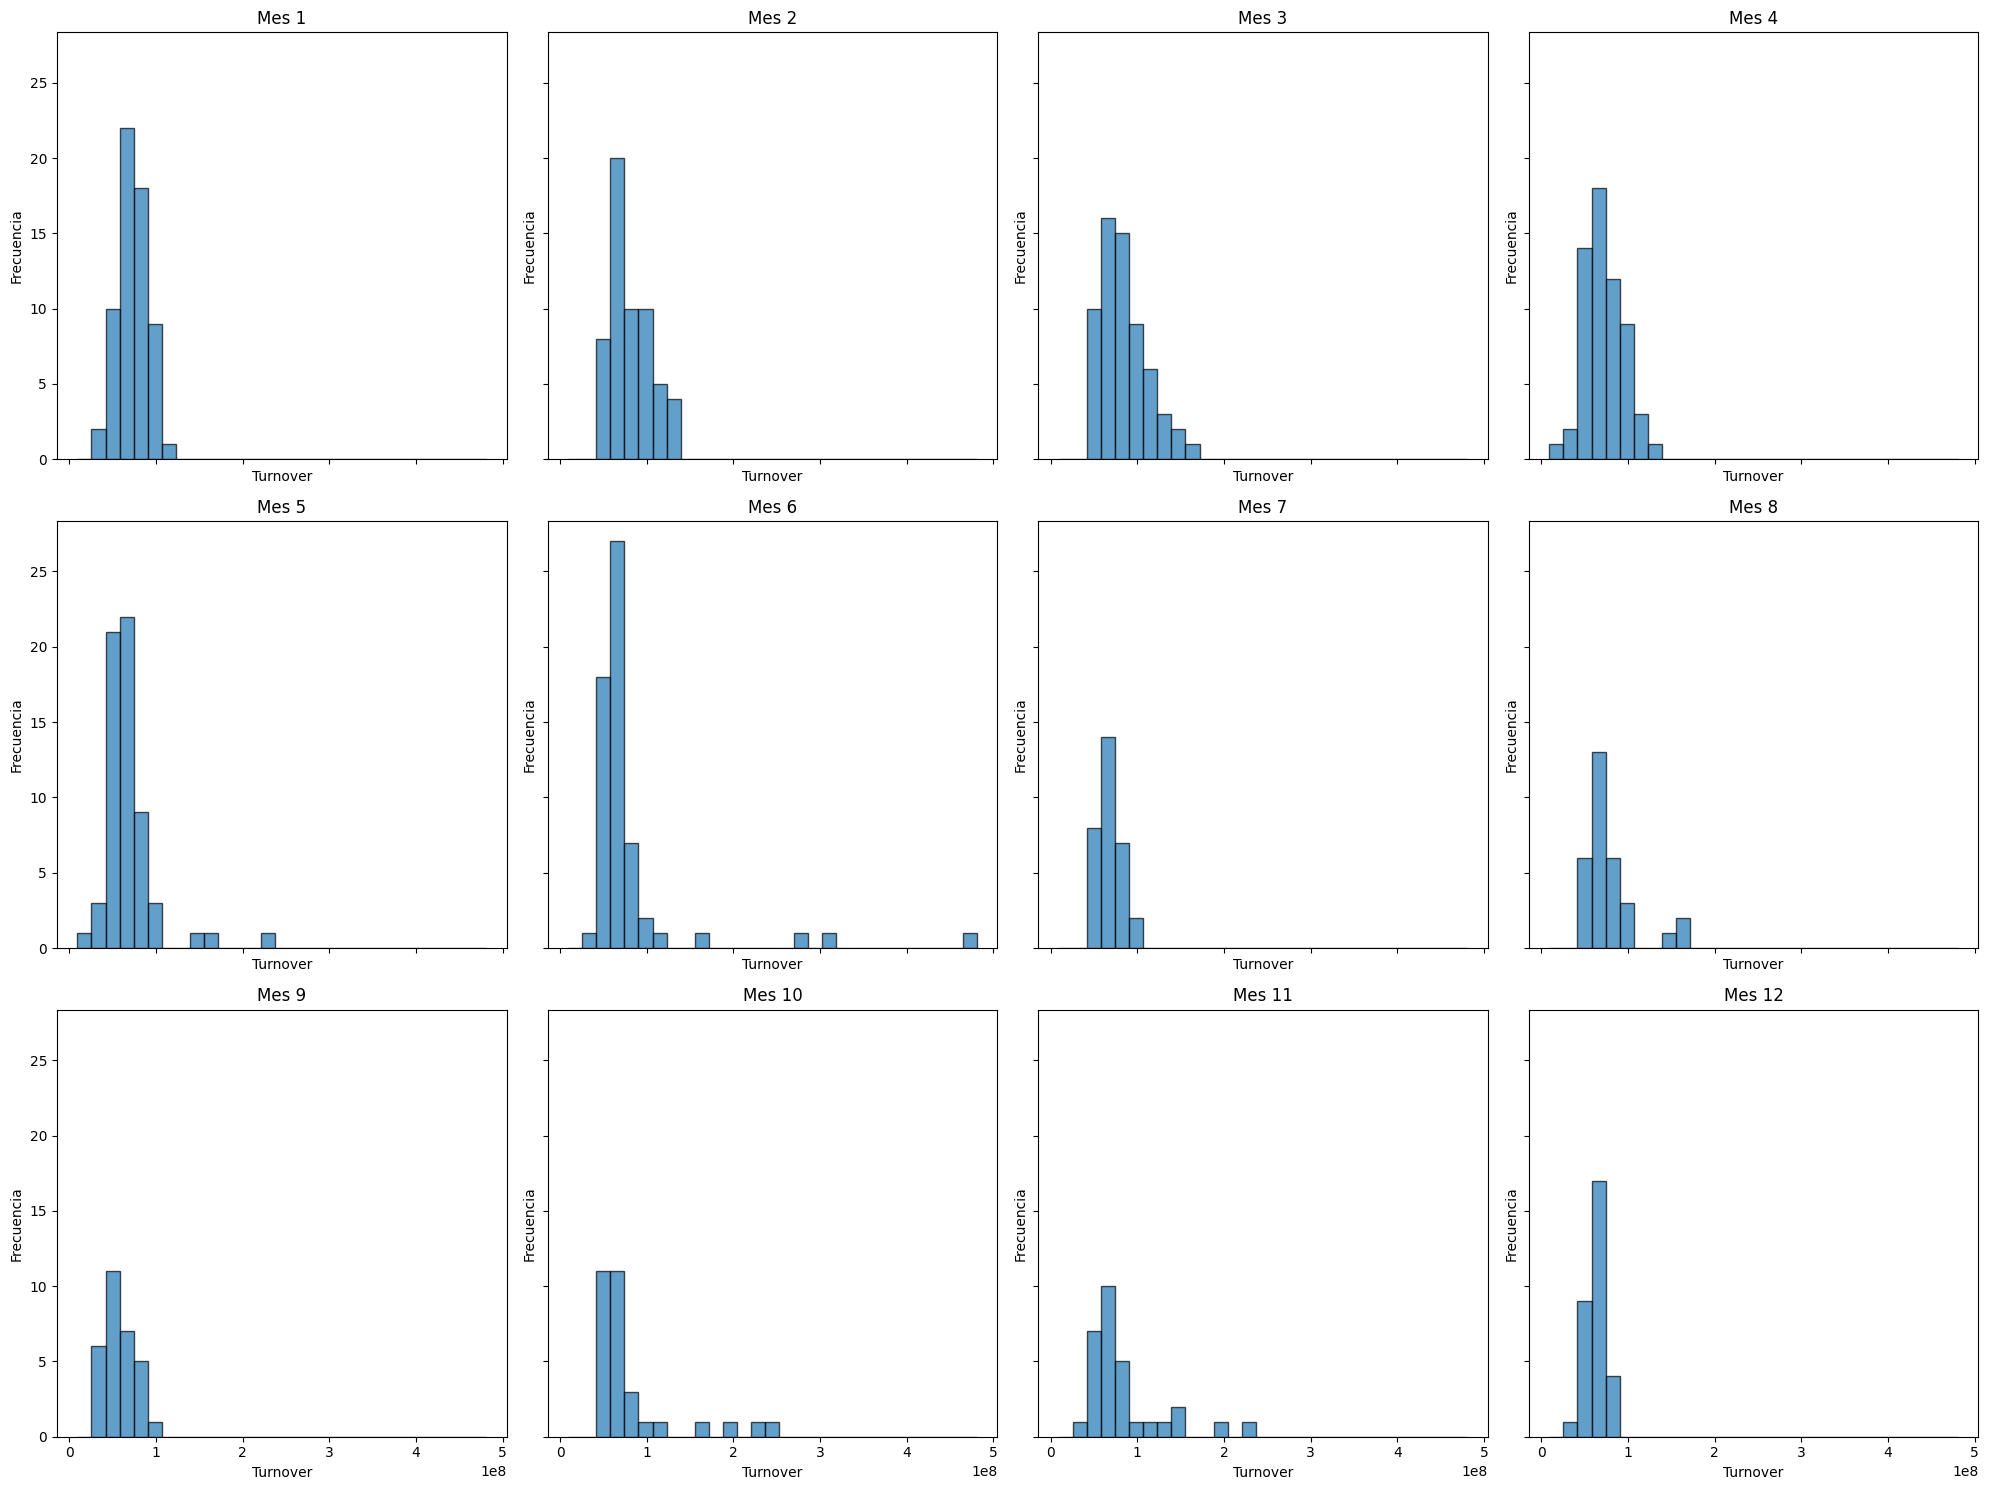

In [54]:
# Extraer el mes y día de la semana de la columna 'date'
df_turnover['month'] = df_turnover['date'].dt.month
df_turnover['day_of_week'] = df_turnover['date'].dt.dayofweek

# Crear histogramas para cada mes
min_turnover = df_turnover['turnover'].min()
max_turnover = df_turnover['turnover'].max()
bins = np.linspace(min_turnover, max_turnover, 30)

fig, axes = plt.subplots(3, 4, figsize=(20, 15), sharex=True, sharey=True)
axes = axes.flatten()

for month, ax in enumerate(axes, start=1):
    monthly_data = df_turnover[df_turnover['month'] == month]['turnover']
    ax.hist(monthly_data, bins=bins, edgecolor='k', alpha=0.7)
    ax.set_title(f'Mes {month}')
    ax.set_xlabel('Turnover')
    ax.set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

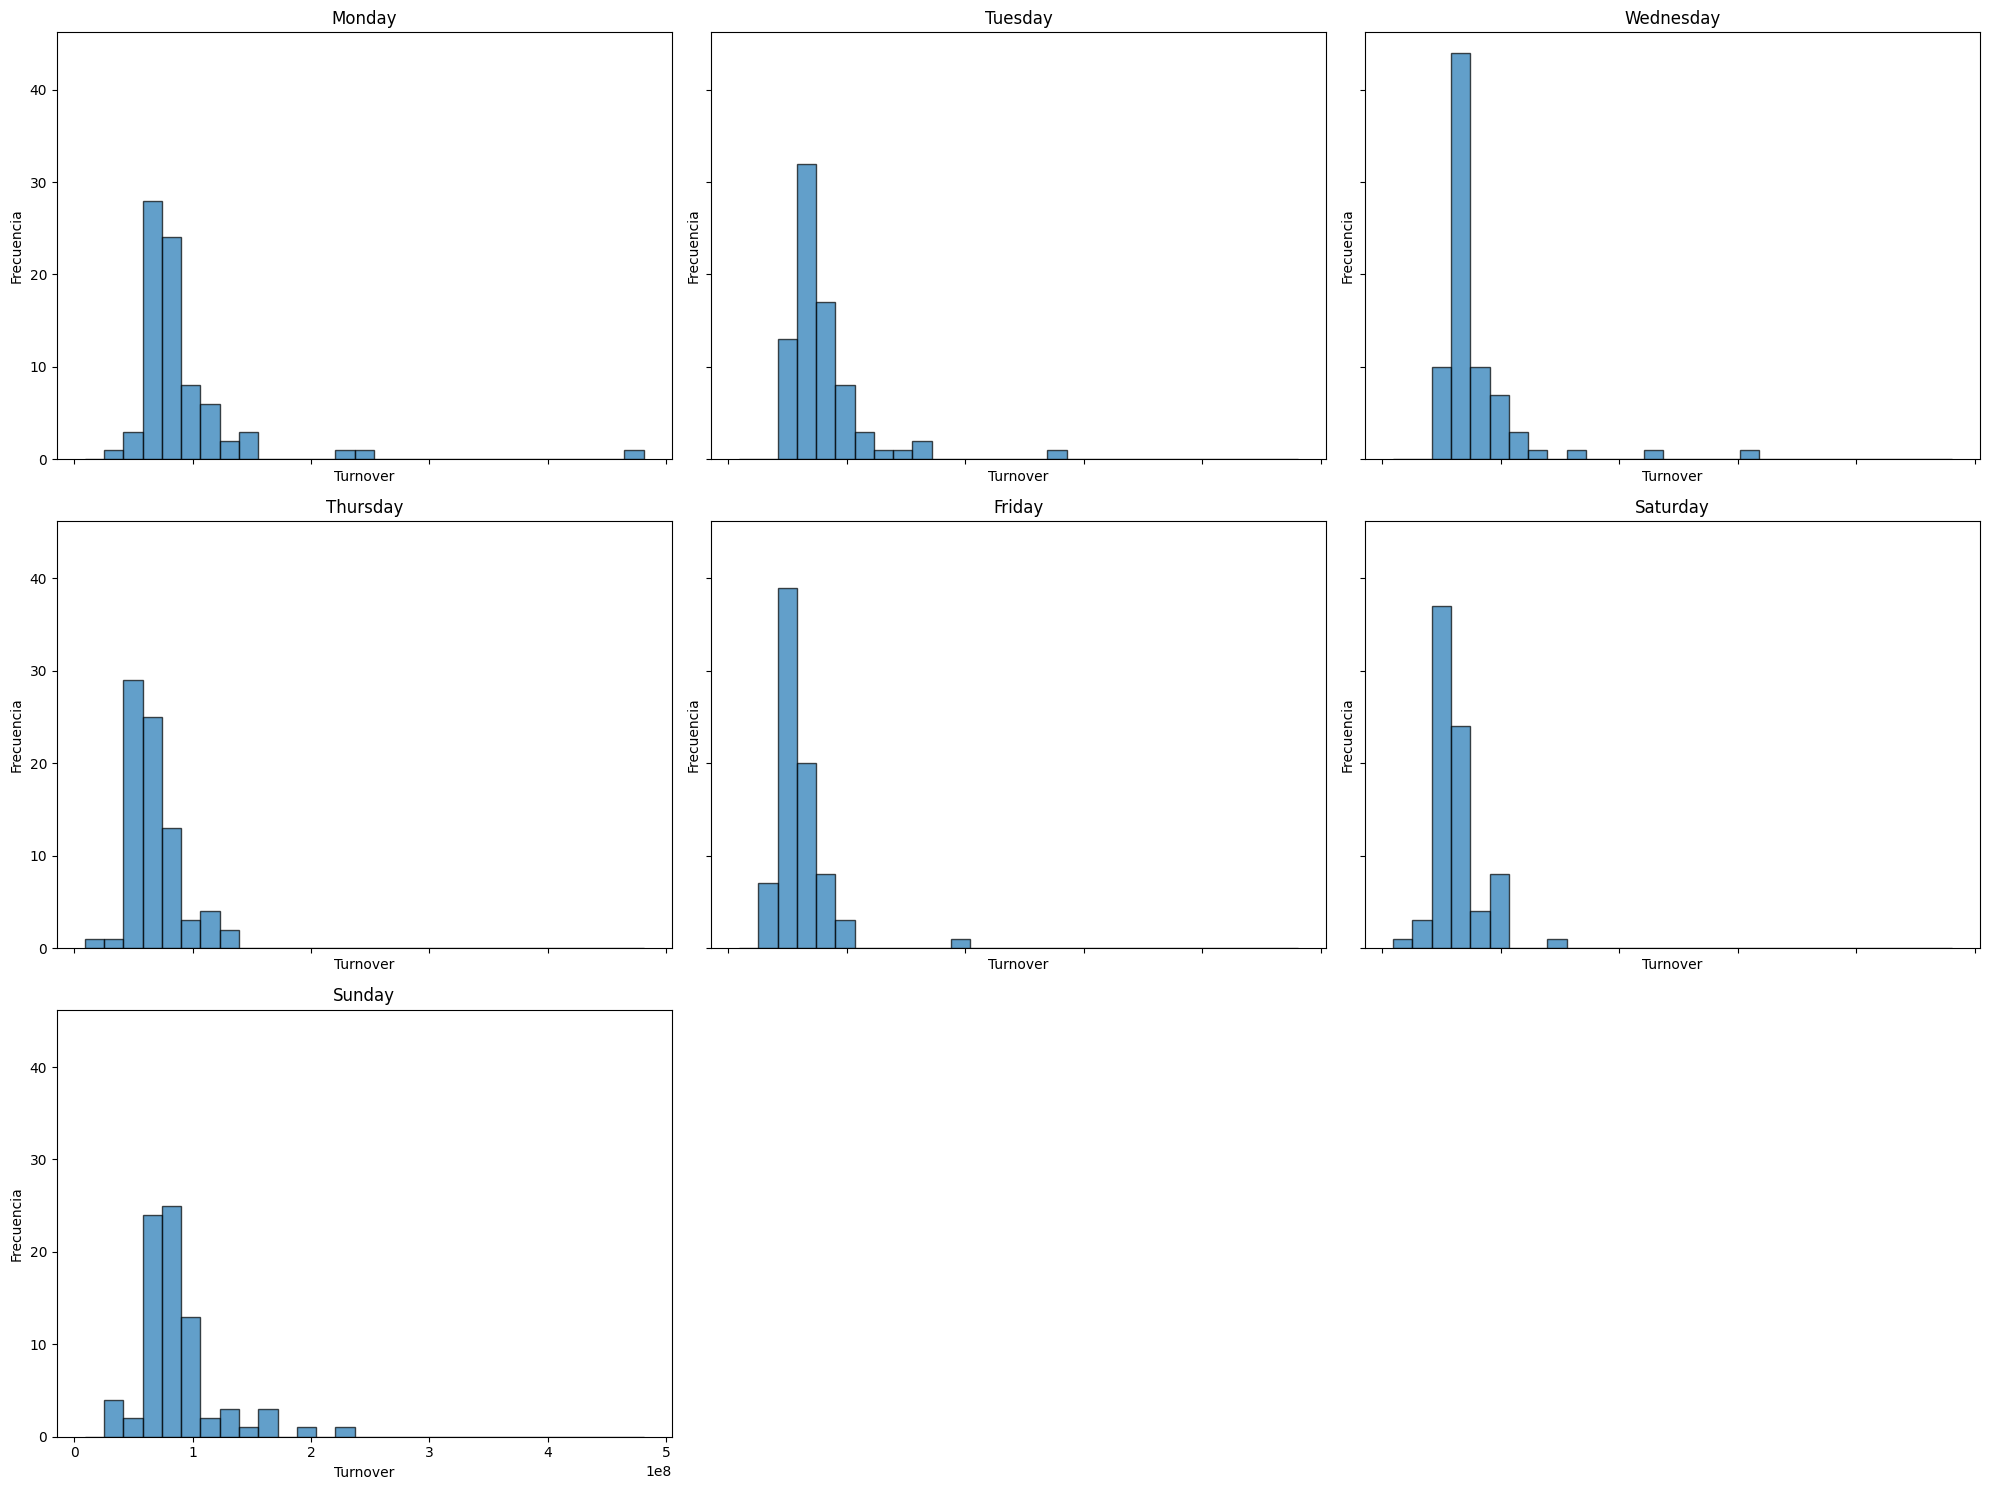

In [55]:
# Crear histogramas para cada día de la semana
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

fig, axes = plt.subplots(3, 3, figsize=(20, 15), sharex=True, sharey=True)
axes = axes.flatten()

for i, ax in enumerate(axes[:7]):
    daily_data = df_turnover[df_turnover['day_of_week'] == i]['turnover']
    ax.hist(daily_data, bins=bins, edgecolor='k', alpha=0.7)
    ax.set_title(days_of_week[i])
    ax.set_xlabel('Turnover')
    ax.set_ylabel('Frecuencia')

for ax in axes[7:]:
    fig.delaxes(ax)

plt.tight_layout()
plt.show()

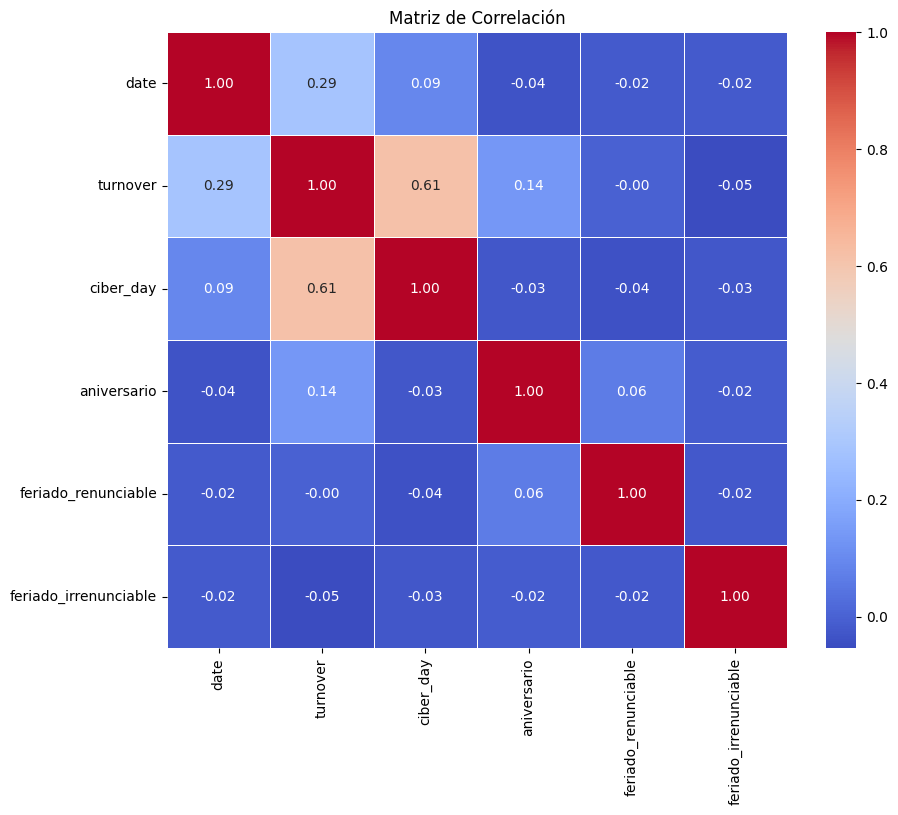

In [56]:
# Calcular la matriz de correlación
correlation_matrix = df_combined.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Matriz de Correlación')
plt.show()

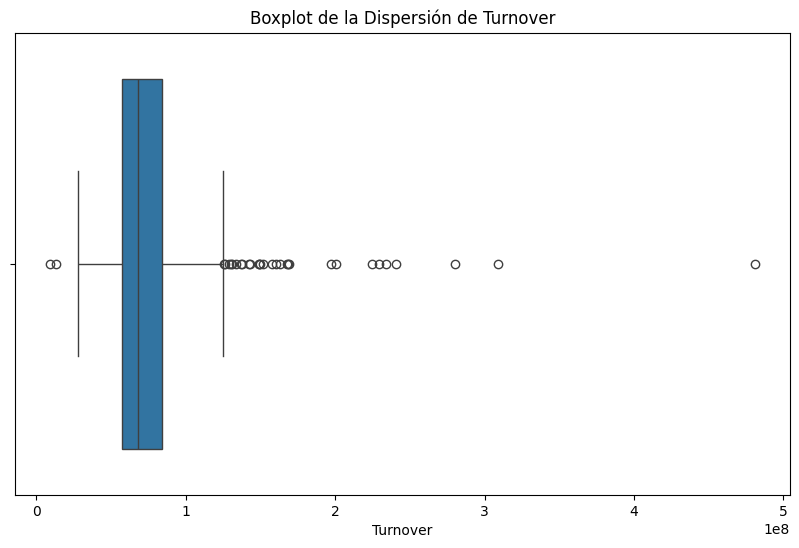

In [57]:
# Crear el boxplot de la dispersión de turnover
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_turnover, x='turnover')
plt.title('Boxplot de la Dispersión de Turnover')
plt.xlabel('Turnover')
plt.show()

In [58]:
# Calcular el promedio de turnover
average_turnover = df_turnover['turnover'].mean()
print(f"El promedio de turnover es: {average_turnover}")

El promedio de turnover es: 75004768.74040219


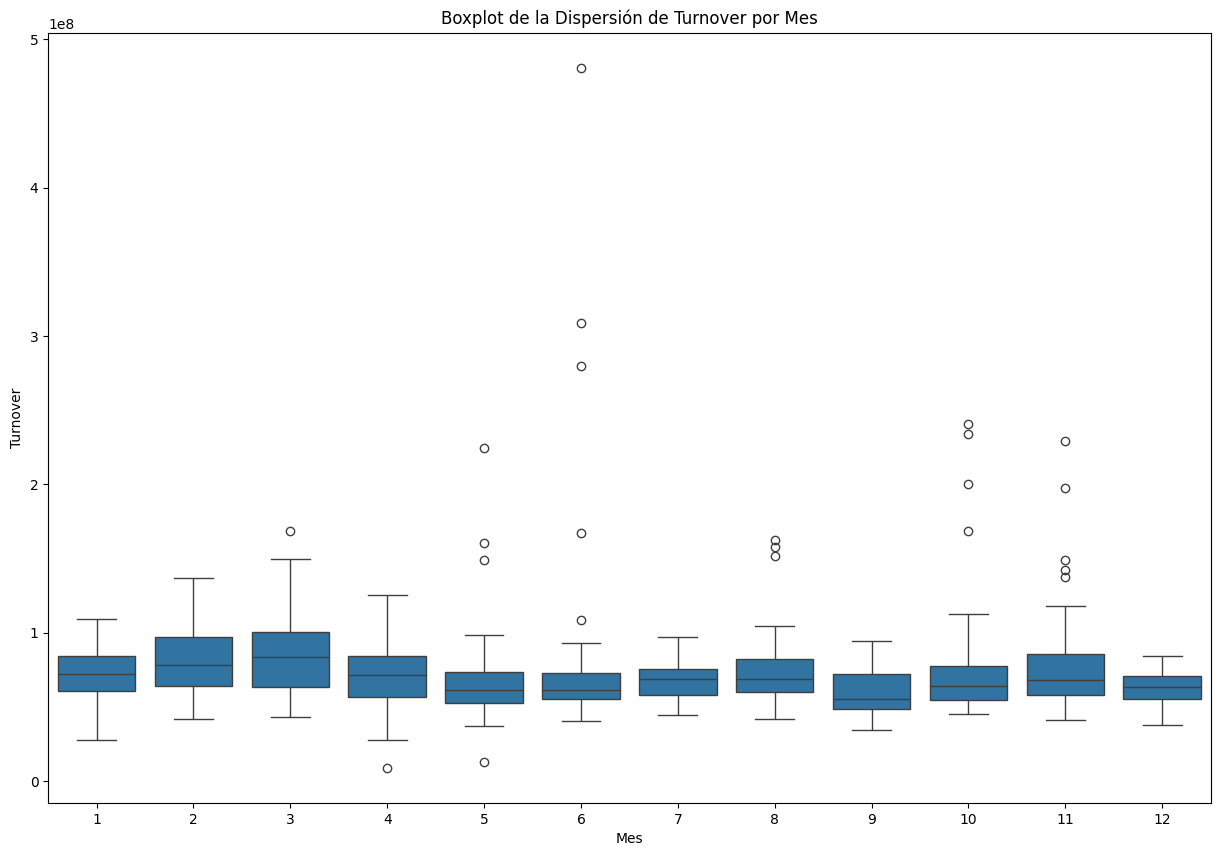

In [59]:
# Añadir columna de mes y crear boxplot por mes
df_turnover.set_index('date', inplace=True)
df_turnover['month'] = df_turnover.index.month

plt.figure(figsize=(15, 10))
sns.boxplot(data=df_turnover, x='month', y='turnover')
plt.title('Boxplot de la Dispersión de Turnover por Mes')
plt.xlabel('Mes')
plt.ylabel('Turnover')
plt.show()

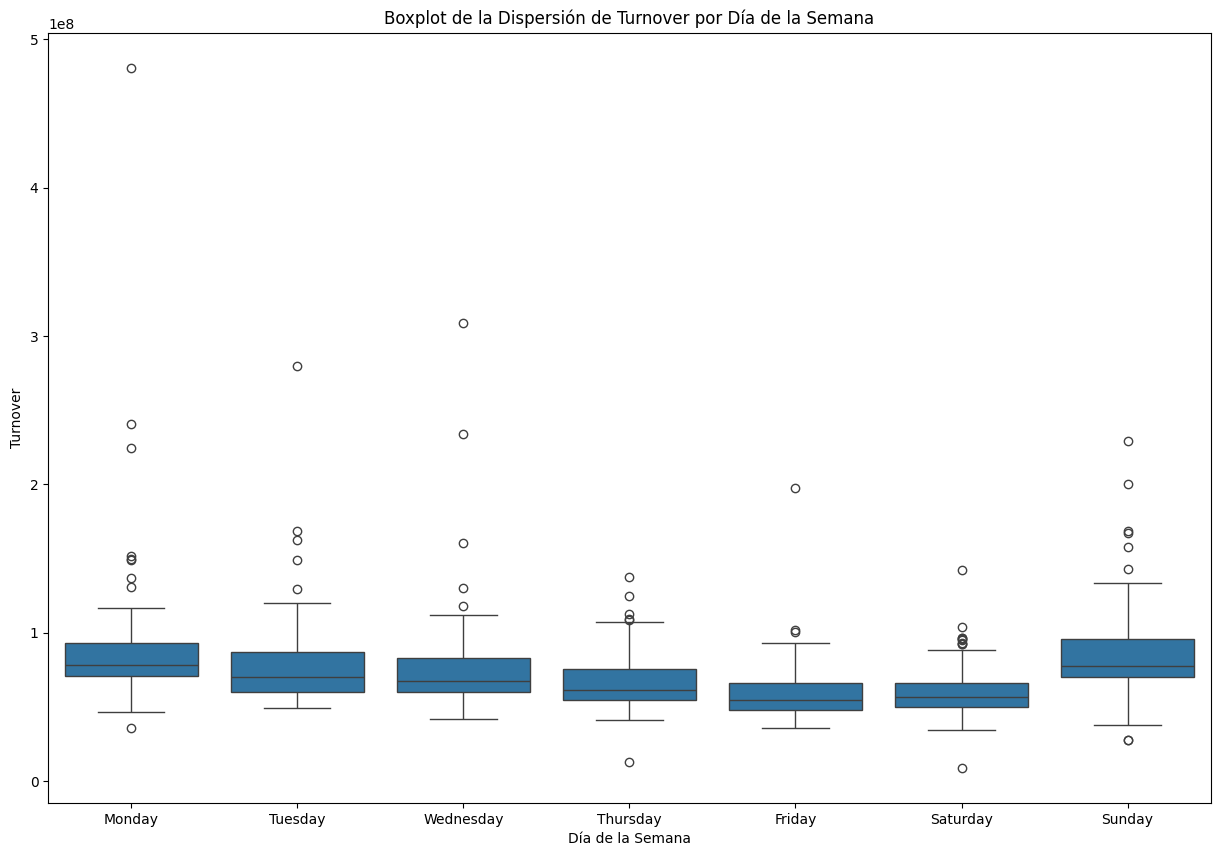

In [60]:
# Añadir columna de día de la semana y crear boxplot por día de la semana
df_turnover['day_name'] = df_turnover.index.day_name()

plt.figure(figsize=(15, 10))
sns.boxplot(data=df_turnover, x='day_name', y='turnover', order=days_of_week)
plt.title('Boxplot de la Dispersión de Turnover por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Turnover')
plt.show()

C:\Users\cjret\AppData\Local\Temp\ipykernel_5100\4045092167.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_turnover['turnover'], shade=True)


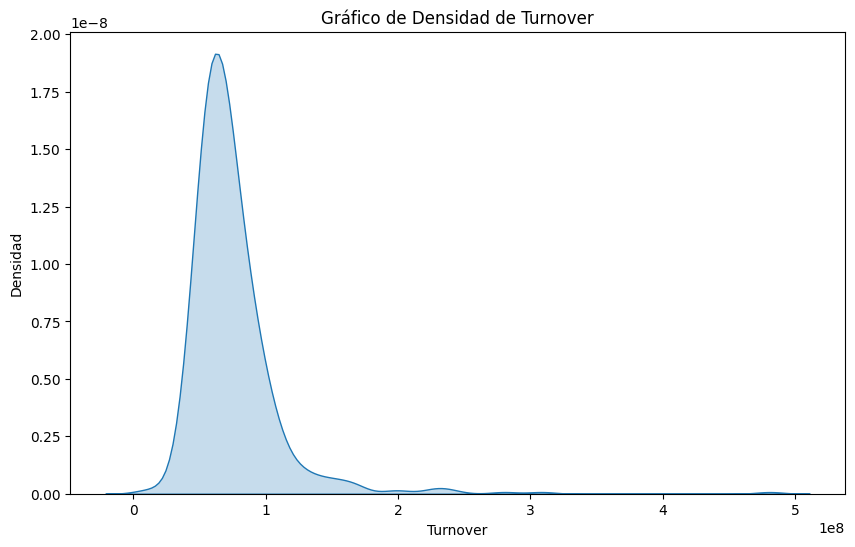

In [61]:
# Crear gráfico de densidad de turnover
plt.figure(figsize=(10, 6))
sns.kdeplot(df_turnover['turnover'], shade=True)
plt.title('Gráfico de Densidad de Turnover')
plt.xlabel('Turnover')
plt.ylabel('Densidad')
plt.show()

C:\Users\cjret\AppData\Local\Temp\ipykernel_5100\1610787037.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['turnover'], shade=True, ax=ax)
C:\Users\cjret\AppData\Local\Temp\ipykernel_5100\1610787037.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['turnover'], shade=True, ax=ax)
C:\Users\cjret\AppData\Local\Temp\ipykernel_5100\1610787037.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['turnover'], shade=True, ax=ax)
C:\Users\cjret\AppData\Local\Temp\ipykernel_5100\1610787037.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error

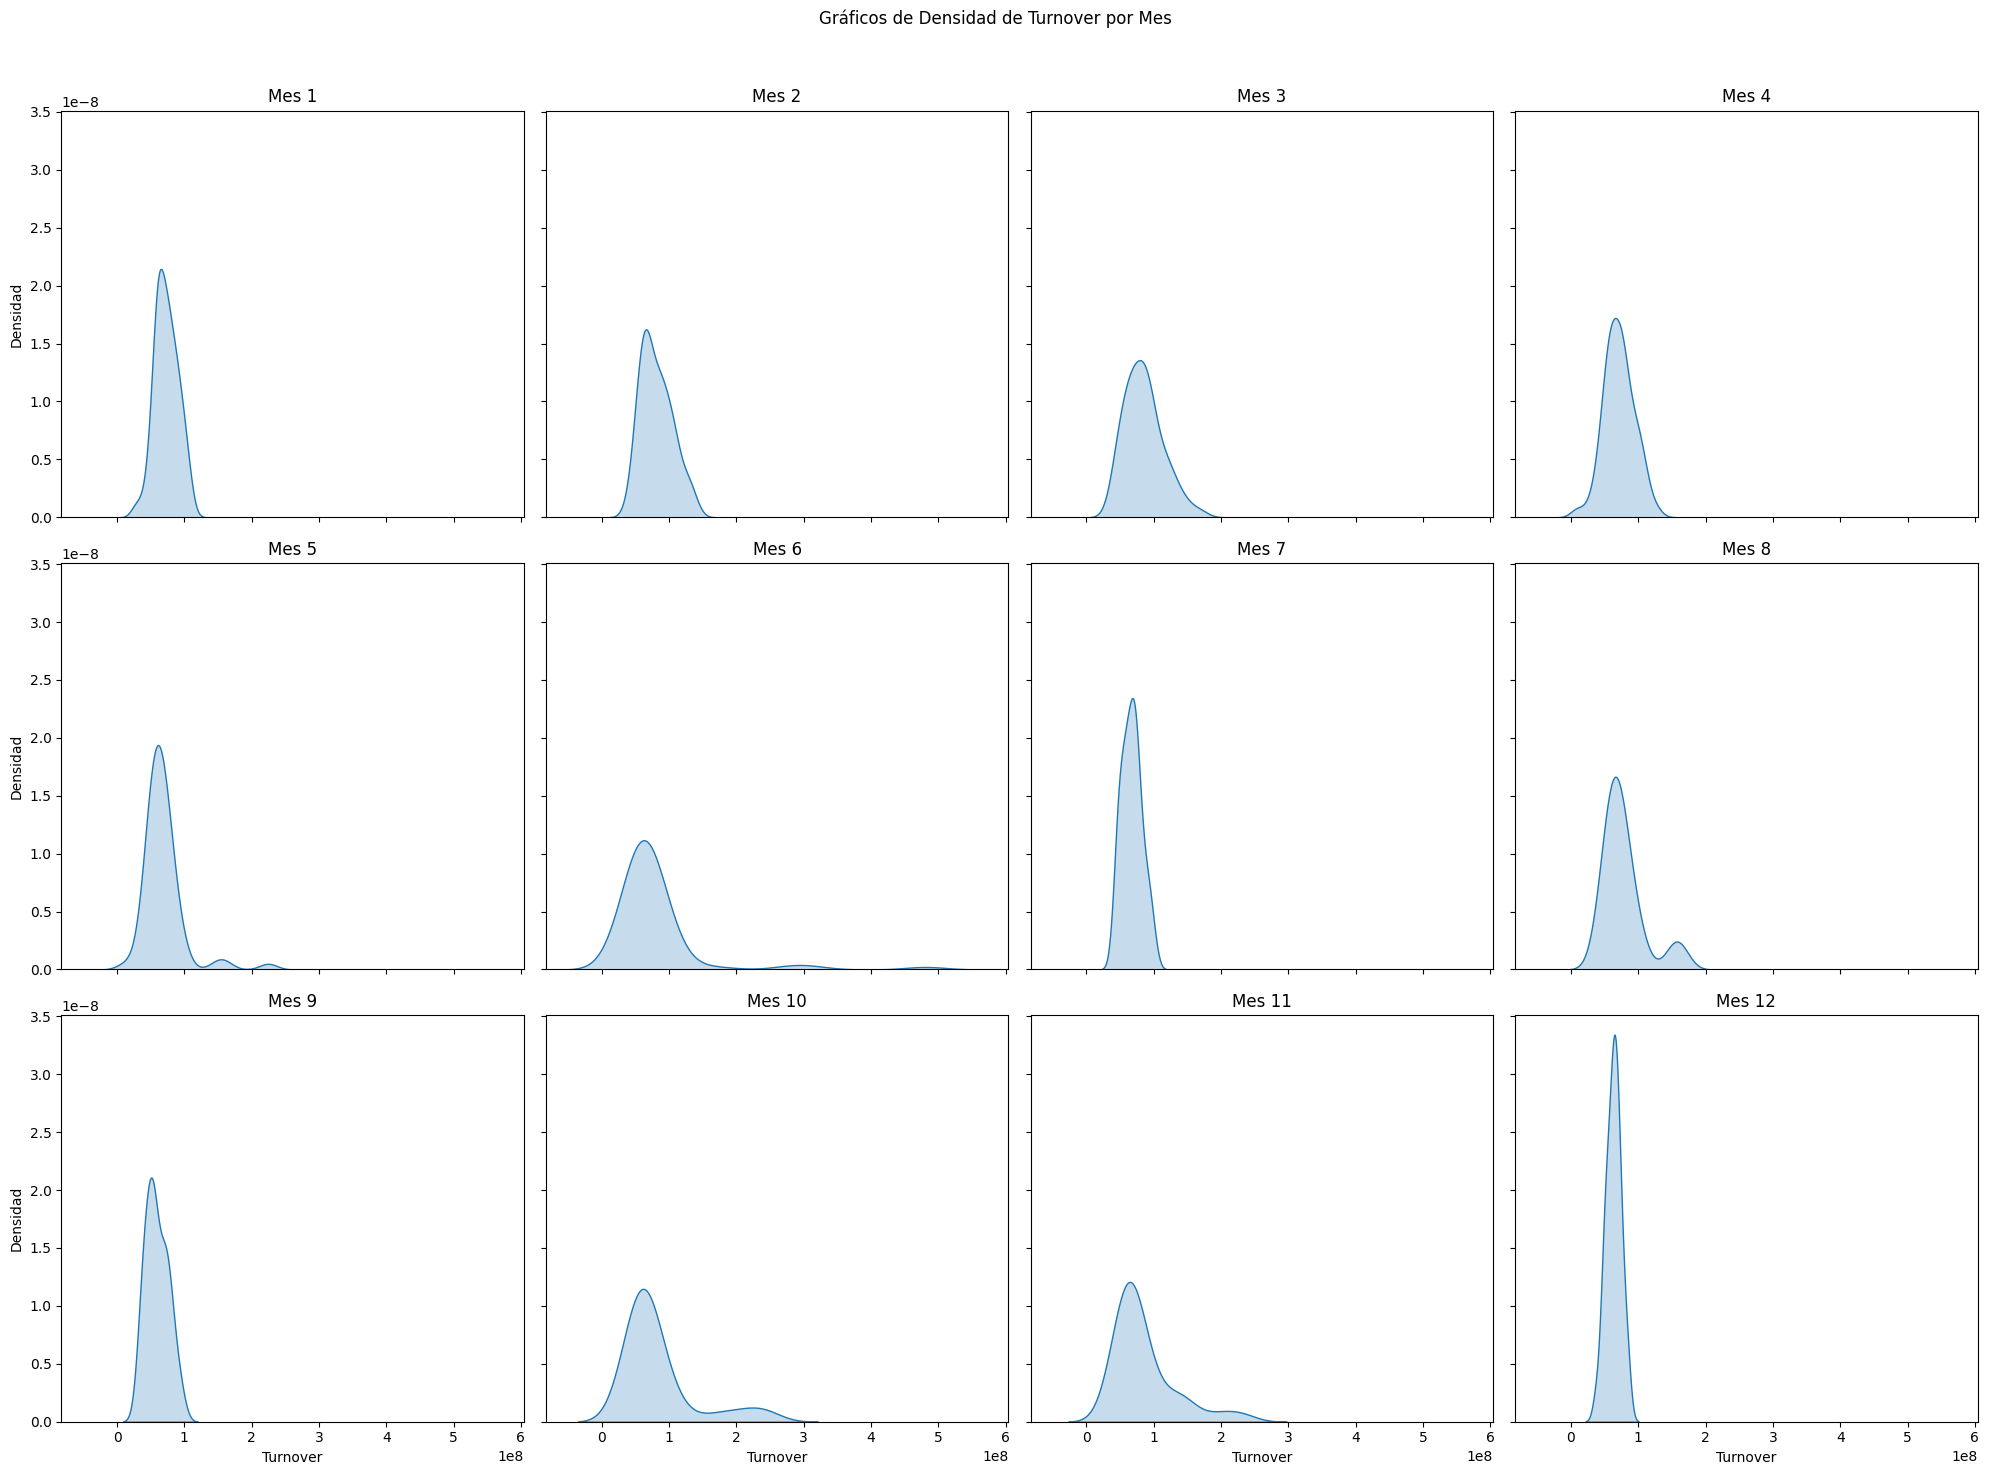

In [62]:
# Crear gráficos de densidad para cada mes
fig, axes = plt.subplots(3, 4, figsize=(20, 15), sharex=True, sharey=True)
fig.suptitle('Gráficos de Densidad de Turnover por Mes')

for i, month in enumerate(range(1, 13)):
    ax = axes[i // 4, i % 4]
    subset = df_turnover[df_turnover['month'] == month]
    sns.kdeplot(subset['turnover'], shade=True, ax=ax)
    ax.set_title(f'Mes {month}')
    ax.set_xlabel('Turnover')
    ax.set_ylabel('Densidad')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

C:\Users\cjret\AppData\Local\Temp\ipykernel_5100\356755827.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['turnover'], shade=True, ax=ax)
C:\Users\cjret\AppData\Local\Temp\ipykernel_5100\356755827.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['turnover'], shade=True, ax=ax)
C:\Users\cjret\AppData\Local\Temp\ipykernel_5100\356755827.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['turnover'], shade=True, ax=ax)
C:\Users\cjret\AppData\Local\Temp\ipykernel_5100\356755827.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in 

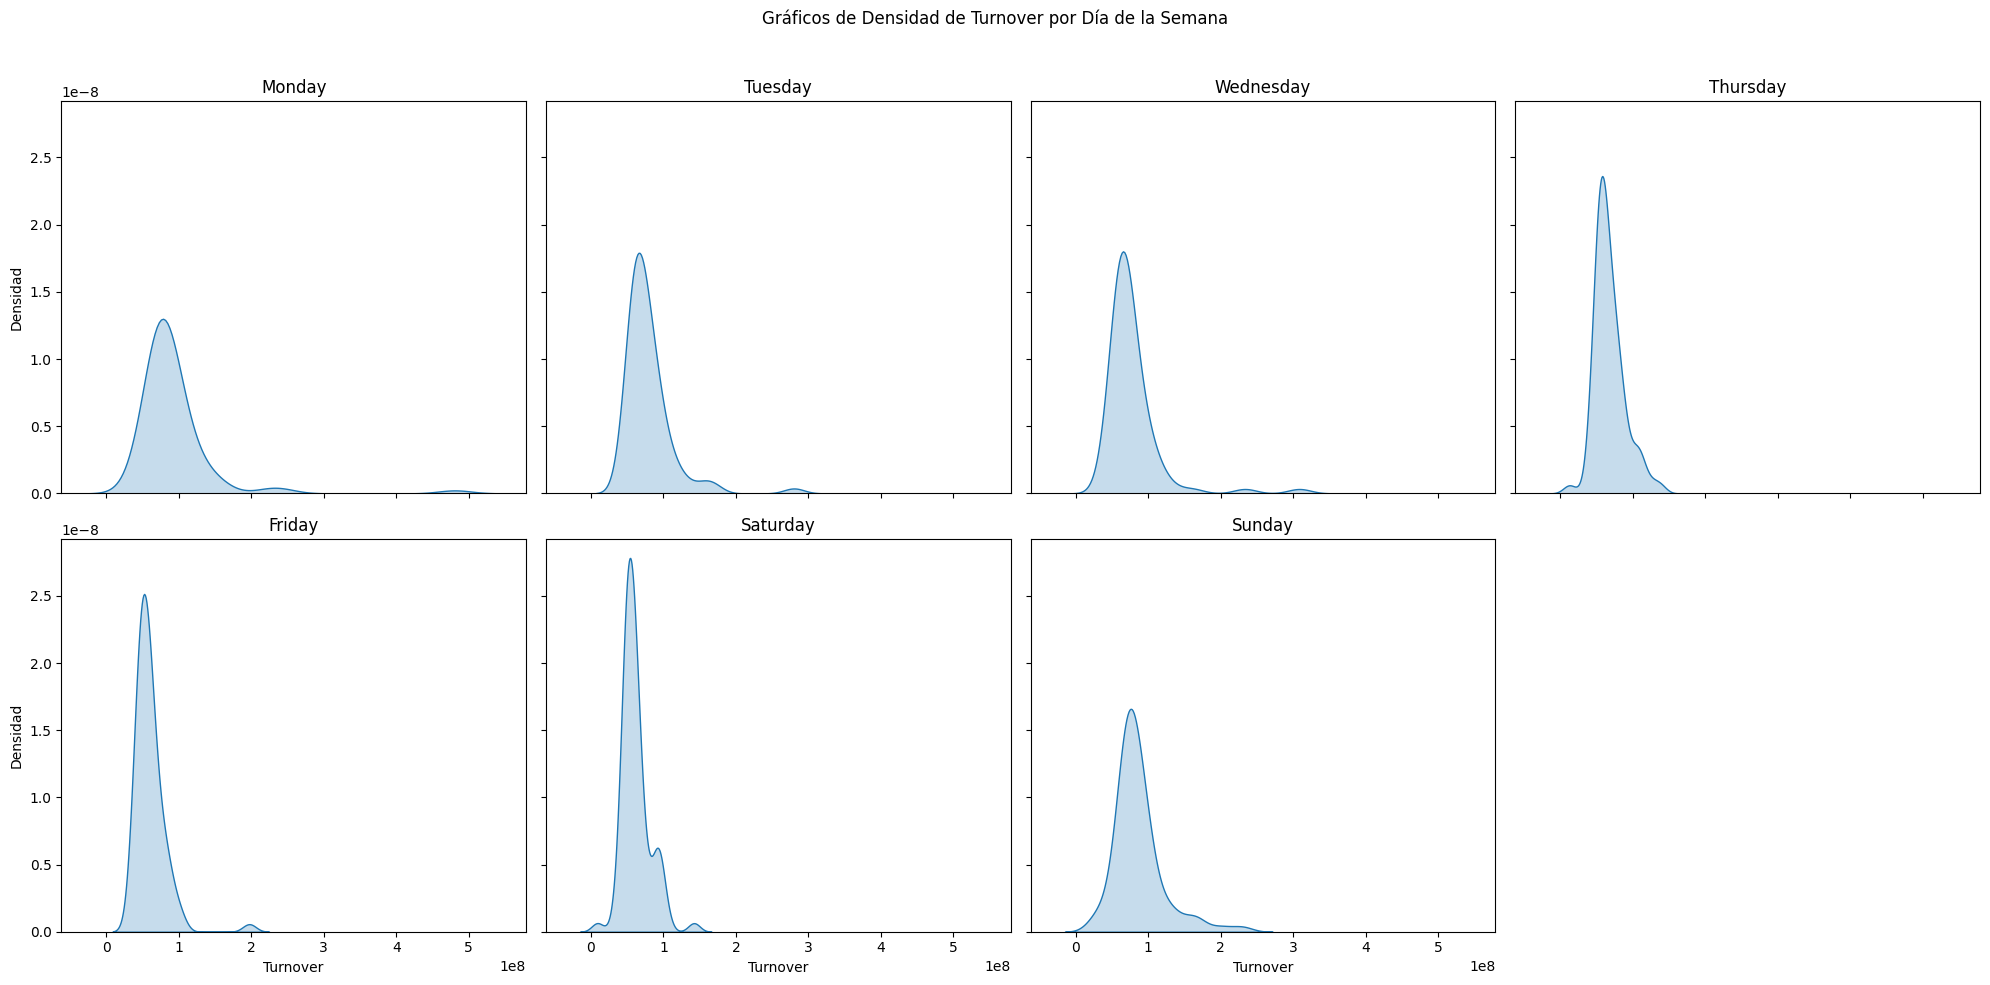

In [63]:
# Crear gráficos de densidad para cada día de la semana
fig, axes = plt.subplots(2, 4, figsize=(20, 10), sharex=True, sharey=True)
fig.suptitle('Gráficos de Densidad de Turnover por Día de la Semana')

for i, day in enumerate(days_of_week):
    ax = axes[i // 4, i % 4]
    subset = df_turnover[df_turnover['day_name'] == day]
    sns.kdeplot(subset['turnover'], shade=True, ax=ax)
    ax.set_title(day)
    ax.set_xlabel('Turnover')
    ax.set_ylabel('Densidad')

if len(days_of_week) % 4 != 0:
    fig.delaxes(axes[-1, -1])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

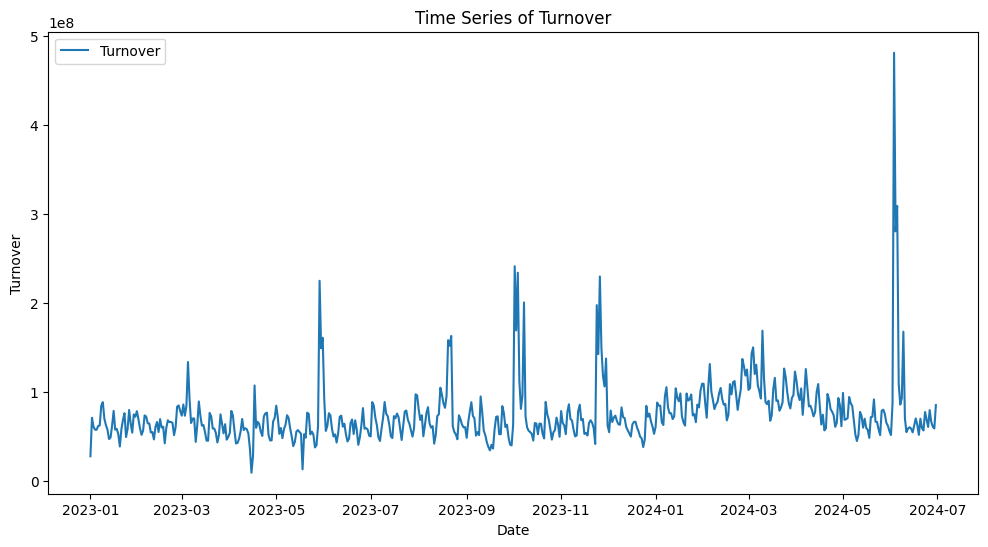

In [64]:
# Crear la serie temporal
plt.figure(figsize=(12, 6))
plt.plot(df_turnover.index, df_turnover['turnover'], label='Turnover')
plt.xlabel('Date')
plt.ylabel('Turnover')
plt.title('Time Series of Turnover')
plt.legend()
plt.show()


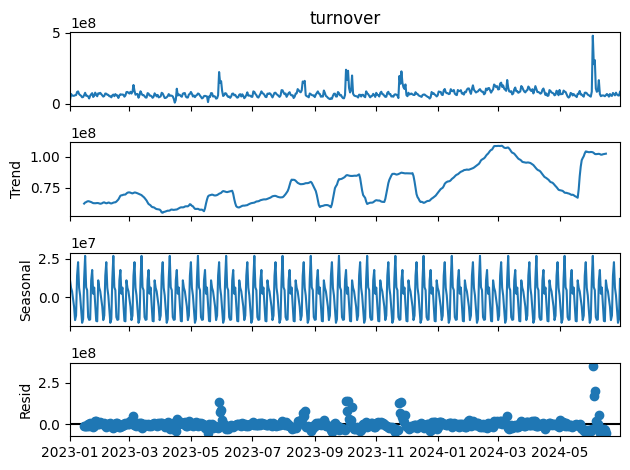

In [65]:
# Descomposición de la serie temporal con un periodo de 28 días
result = seasonal_decompose(df_turnover['turnover'], model='additive', period=28)
result.plot()
plt.show()

C:\Users\cjret\AppData\Local\Temp\ipykernel_5100\2857304942.py:12: UserWarning: The palette list has more values (7) than needed (2), which may not be intended.
  sns.boxplot(data=df_turnover, x='month', y='turnover', hue='year', palette=custom_palette)


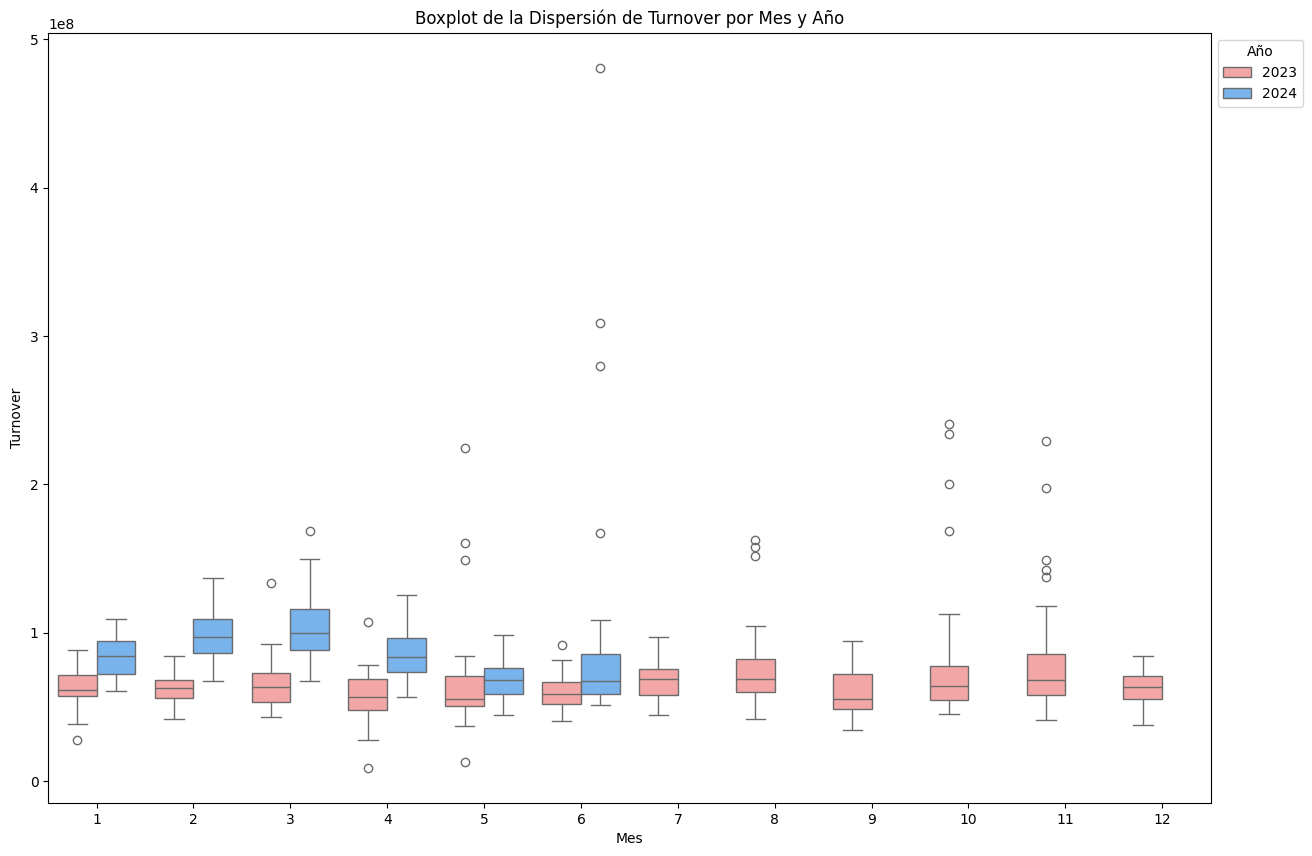

In [66]:
# Añadir columnas para el mes y el año
df_turnover['month'] = df_turnover.index.month
df_turnover['year'] = df_turnover.index.year
df_turnover['month_year'] = df_turnover.index.to_period('M')

# Definir una paleta de colores personalizada
# Puedes definir tantos colores como años en tu conjunto de datos
custom_palette = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99', '#FF6666', '#FFB3E6', '#C2C2F0']

# Crear el boxplot para mes y año con colores personalizados
plt.figure(figsize=(15, 10))
sns.boxplot(data=df_turnover, x='month', y='turnover', hue='year', palette=custom_palette)
plt.title('Boxplot de la Dispersión de Turnover por Mes y Año')
plt.xlabel('Mes')
plt.ylabel('Turnover')
plt.legend(title='Año', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [67]:
# Identificar los outliers
outliers = []

for key, group in df_turnover.groupby(['month', 'year']):
    Q1 = group['turnover'].quantile(0.25)
    Q3 = group['turnover'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    group_outliers = group[(group['turnover'] < lower_bound) | (group['turnover'] > upper_bound)]
    outliers.append(group_outliers)

outliers_df = pd.concat(outliers)

# Mostrar los outliers con sus fechas y valores
print("Observaciones Anómalas (Outliers):")
print(outliers_df[['turnover']])

Observaciones Anómalas (Outliers):
             turnover
date                 
2023-01-01   27623181
2023-03-05  133443107
2024-03-10  168628737
2023-04-15    9110813
2023-04-17  107150849
2023-05-18   12927559
2023-05-29  224672333
2023-05-30  148842090
2023-05-31  160680261
2023-06-01   91850905
2024-06-03  480826567
2024-06-04  280146918
2024-06-05  308715225
2024-06-09  167531016
2023-08-20  157977268
2023-08-21  151644439
2023-08-22  162716894
2023-10-02  240992964
2023-10-03  168935416
2023-10-04  233757202
2023-10-08  200358558
2023-11-24  197339802
2023-11-25  142261090
2023-11-26  229535098
2023-11-27  149198923
2023-11-30  137378726


In [68]:
# Unir DataFrames por la columna 'date'
df_combined = pd.merge(outliers_df, df_exogenas, on='date', how='left')

# Determinar si alguna variable exógena es 1 para cada outlier
df_combined['has_event'] = df_combined[['ciber_day', 'aniversario', 'feriado_renunciable', 'feriado_irrenunciable']].any(axis=1)

# Filtrar los outliers con evento y sin evento
outliers_with_event = df_combined[df_combined['has_event']]
outliers_without_event = df_combined[~df_combined['has_event']]

# Mostrar los resultados
print("Outliers con Evento Exógeno:")
print(outliers_with_event[['date', 'turnover', 'ciber_day', 'aniversario', 'feriado_renunciable', 'feriado_irrenunciable']])

print("\nOutliers sin Evento Exógeno:")
print(outliers_without_event[['date', 'turnover']])

Outliers con Evento Exógeno:
         date   turnover  ciber_day  aniversario  feriado_renunciable  \
0  2023-01-01   27623181          0            0                    0   
6  2023-05-29  224672333          1            0                    0   
7  2023-05-30  148842090          1            0                    0   
8  2023-05-31  160680261          1            0                    0   
9  2023-06-01   91850905          1            0                    0   
10 2024-06-03  480826567          1            0                    0   
11 2024-06-04  280146918          1            0                    0   
12 2024-06-05  308715225          1            0                    0   
13 2024-06-09  167531016          1            0                    0   
14 2023-08-20  157977268          0            1                    0   
15 2023-08-21  151644439          0            1                    0   
16 2023-08-22  162716894          0            1                    0   
17 2023-10-02  2409929

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         547 non-null    datetime64[ns]
 1   turnover     547 non-null    int64         
 2   ciber_day    547 non-null    int64         
 3   aniversario  547 non-null    int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 17.2 KB
None
        date  turnover  ciber_day  aniversario
0 2023-01-01  27623181          0            0
1 2023-01-02  70778203          0            0
2 2023-01-03  60626103          0            0
3 2023-01-04  57423894          0            0
4 2023-01-05  57374945          0            0
Matriz de Correlación:
                 date  turnover  ciber_day  aniversario
date         1.000000  0.285514   0.052974    -0.019282
turnover     0.285514  1.000000   0.679875     0.172684
ciber_day    0.052974  0.679875   1.000000    -0.013300
aniversari

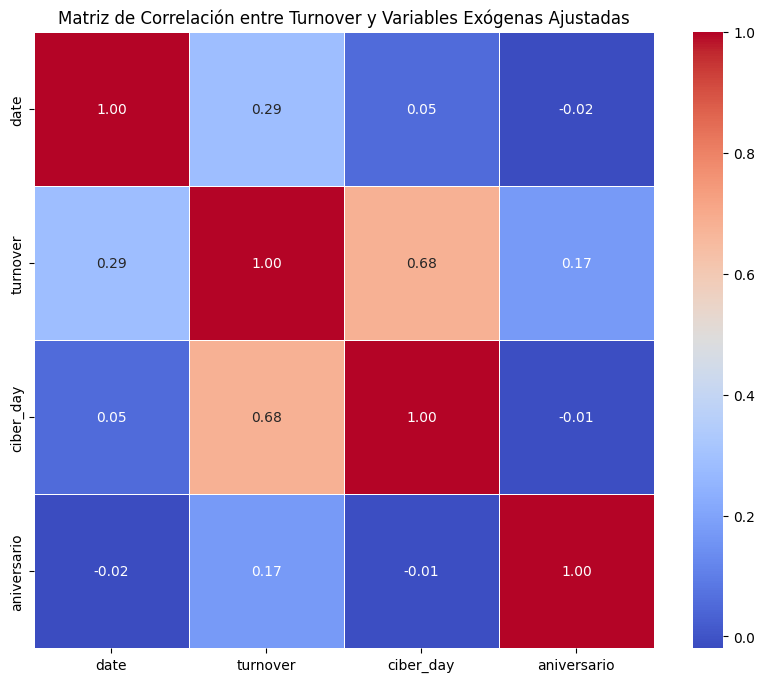

In [69]:
# Cargar los datos de turnover y el archivo ajustado de variables exógenas
df_turnover = pd.read_csv("sales_ecom_history.csv")
df_exogenas_adjusted = pd.read_excel("exogenas_forecast.xlsx")

# Convertir la columna 'date' a datetime para ambos DataFrames
df_turnover['date'] = pd.to_datetime(df_turnover['date'])
df_exogenas_adjusted['date'] = pd.to_datetime(df_exogenas_adjusted['date'])

# Asegurarse de que 'date' esté configurada como índice (opcional, si se prefiere)
# df_turnover.set_index('date', inplace=True)
# df_exogenas_adjusted.set_index('date', inplace=True)

# Unir los DataFrames en función de la columna 'date'
df_combined = pd.merge(df_turnover, df_exogenas_adjusted, on='date')

# Verificar la estructura del DataFrame combinado
print(df_combined.info())
print(df_combined.head())

# Calcular la matriz de correlación
correlation_matrix = df_combined.corr()

# Mostrar la matriz de correlación
print("Matriz de Correlación:")
print(correlation_matrix)

# Visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Matriz de Correlación entre Turnover y Variables Exógenas Ajustadas')
plt.show()


C:\Users\cjret\AppData\Local\Temp\ipykernel_5100\3623431311.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_combined, x='is_ciber_day', y='turnover', palette='Set2')


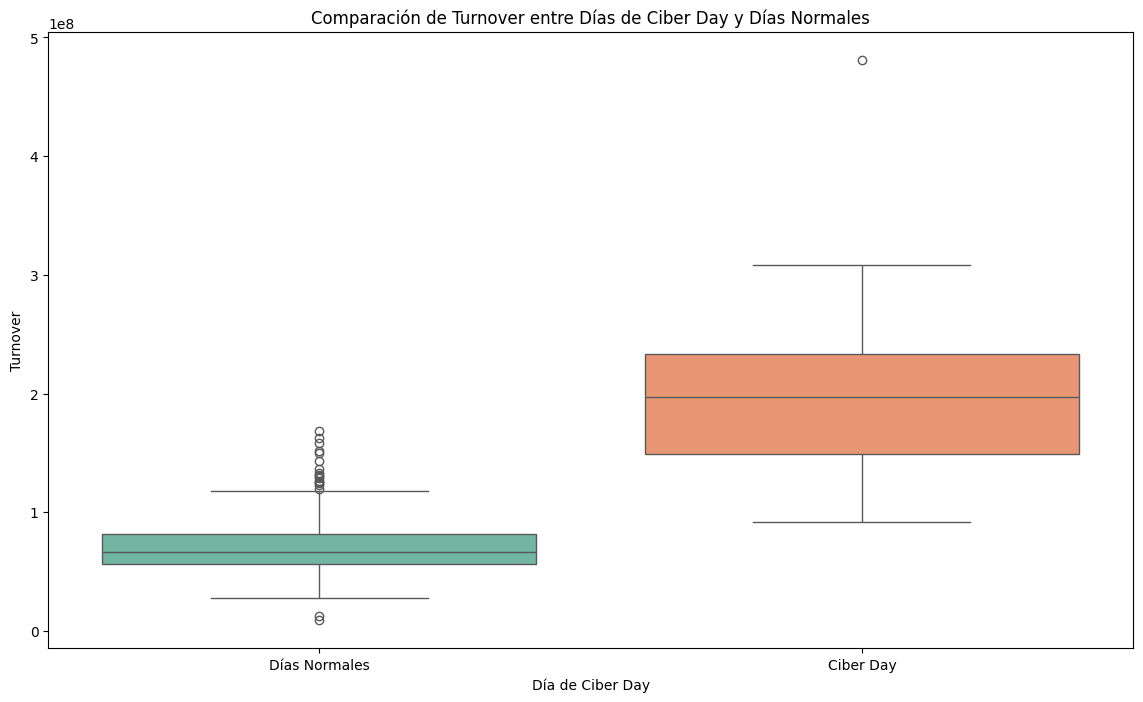

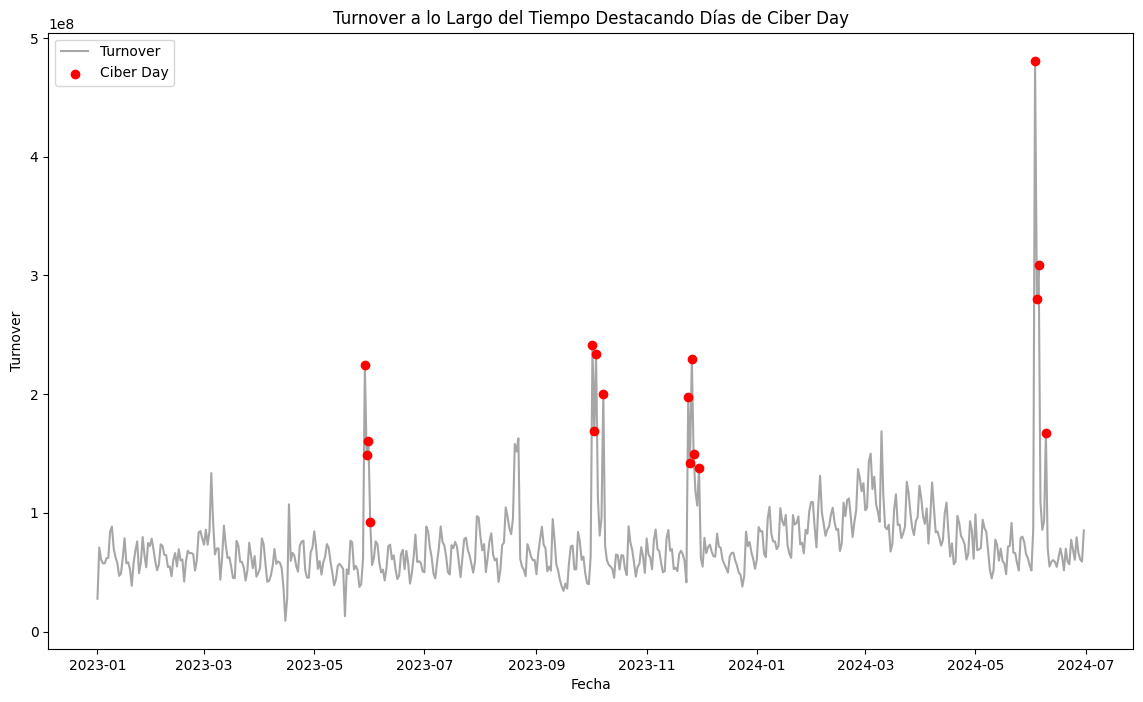

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos de turnover y las variables exógenas ajustadas
df_turnover = pd.read_csv("sales_ecom_history.csv")
df_exogenas_adjusted = pd.read_excel("exogenas_forecast.xlsx")

# Convertir la columna 'date' a datetime
df_turnover['date'] = pd.to_datetime(df_turnover['date'])
df_exogenas_adjusted['date'] = pd.to_datetime(df_exogenas_adjusted['date'])

# Unir los DataFrames en función de la columna 'date'
df_combined = pd.merge(df_turnover, df_exogenas_adjusted, on='date')

# Establecer 'date' como índice
df_combined.set_index('date', inplace=True)

# Añadir una columna para identificar si es un día de 'ciber_day' o no
df_combined['is_ciber_day'] = df_combined['ciber_day'] == 1

# Graficar la comparación de ventas entre días de 'ciber_day' y otros días
plt.figure(figsize=(14, 8))
sns.boxplot(data=df_combined, x='is_ciber_day', y='turnover', palette='Set2')
plt.title('Comparación de Turnover entre Días de Ciber Day y Días Normales')
plt.xlabel('Día de Ciber Day')
plt.ylabel('Turnover')
plt.xticks(ticks=[0, 1], labels=['Días Normales', 'Ciber Day'])
plt.show()

# Graficar el turnover a lo largo del tiempo, destacando los días de Ciber Day
plt.figure(figsize=(14, 8))
plt.plot(df_combined.index, df_combined['turnover'], label='Turnover', color='grey', alpha=0.7)
plt.scatter(df_combined.index[df_combined['is_ciber_day']], df_combined['turnover'][df_combined['is_ciber_day']], color='red', label='Ciber Day', zorder=5)
plt.title('Turnover a lo Largo del Tiempo Destacando Días de Ciber Day')
plt.xlabel('Fecha')
plt.ylabel('Turnover')
plt.legend()
plt.show()


In [87]:
# Suponiendo que df_turnover ya tiene la columna 'outlier' que indica si un día es outlier (1 o 0)
# Y que outliers_with_event y outliers_without_event tienen una columna 'date'

# Crear columnas para indicar si el outlier está relacionado con un evento exógeno
df_turnover['outlier_with_event'] = 0
df_turnover['outlier_without_event'] = 0

# Marcar 1 para outliers relacionados con eventos exógenos
df_turnover.loc[df_turnover['date'].isin(outliers_with_event['date']), 'outlier_with_event'] = 1

# Marcar 1 para outliers no relacionados con eventos exógenos
df_turnover.loc[df_turnover['date'].isin(outliers_without_event['date']), 'outlier_without_event'] = 1

# Mostrar el resultado
print(df_turnover)


          date  turnover  outlier_with_event  outlier_without_event
0   2023-01-01  27623181                   1                      0
1   2023-01-02  70778203                   0                      0
2   2023-01-03  60626103                   0                      0
3   2023-01-04  57423894                   0                      0
4   2023-01-05  57374945                   0                      0
..         ...       ...                 ...                    ...
542 2024-06-26  79438697                   0                      0
543 2024-06-27  66344673                   0                      0
544 2024-06-28  60750238                   0                      0
545 2024-06-29  58865685                   0                      0
546 2024-06-30  85144544                   0                      0

[547 rows x 4 columns]


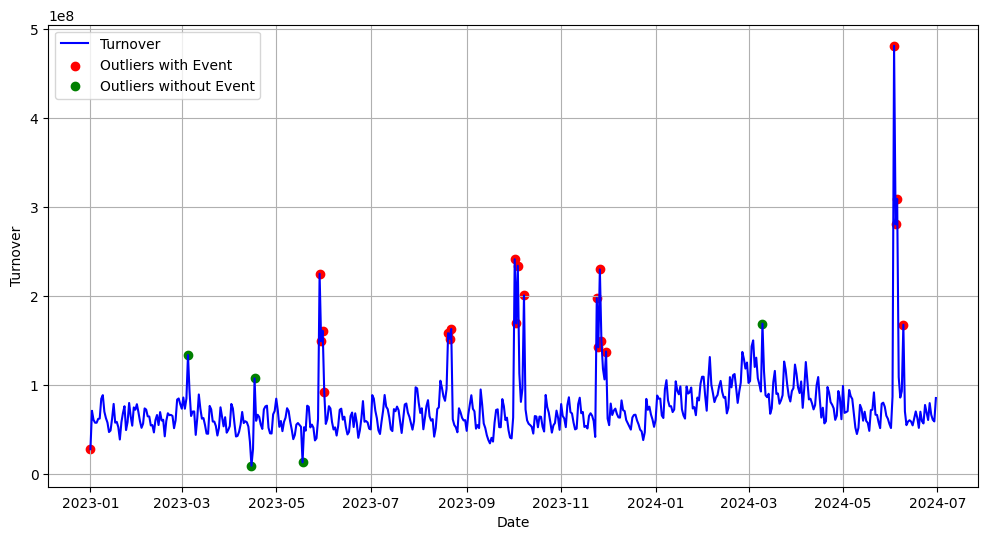

In [89]:
import matplotlib.pyplot as plt

# Crear la figura y los ejes
plt.figure(figsize=(12, 6))

# Graficar la serie temporal completa
plt.plot(df_turnover['date'], df_turnover['turnover'], label='Turnover', color='blue')

# Resaltar los outliers con eventos exógenos en rojo
plt.scatter(df_turnover[df_turnover['outlier_with_event'] == 1]['date'], 
            df_turnover[df_turnover['outlier_with_event'] == 1]['turnover'], 
            color='red', label='Outliers with Event')

# Resaltar los outliers sin eventos exógenos en verde
plt.scatter(df_turnover[df_turnover['outlier_without_event'] == 1]['date'], 
            df_turnover[df_turnover['outlier_without_event'] == 1]['turnover'], 
            color='green', label='Outliers without Event')

# Configurar los títulos y etiquetas
plt.xlabel('Date')
plt.ylabel('Turnover')
plt.legend()

# Mostrar la gráfica
plt.grid(True)
plt.show()
